In [80]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
import warnings
warnings.filterwarnings("ignore")

In [42]:
df=pd.read_csv('data/Season_2016_TeamIDs.csv')

In [43]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

Find and eliminate NaNs

In [64]:
df.A_win_probability_subtracted

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2423   NaN
2424   NaN
2425   NaN
2426   NaN
2427   NaN
Name: A_win_probability_subtracted, Length: 2428, dtype: float64

In [62]:
for column in df.columns:
    print(column)

H_name
H_at_bats
H_runs
H_hits
H_rbi
H_earned_runs
H_bases_on_balls
H_strikeouts
H_plate_appearances
H_batting_average
H_on_base_percentage
H_slugging_percentage
H_on_base_plus
H_pitches
H_strikes
H_win_probability_for_offensive_player
H_average_leverage_index
H_win_probability_added
H_win_probability_subtracted
H_base_out_runs_added
H_putouts
H_assists
H_innings_pitched
H_HR
H_strikes_by_contact
H_strikes_swinging
H_strikes_looking
H_grounded_balls
H_fly_balls
H_line_drives
H_unknown_bat_type
H_game_score
H_inherited_runners
H_inherited_score
H_win_probability_by_pitcher
H_base_out_runs_saved
H_Opp_at_bats
H_Opp_runs
H_Opp_hits
H_Opp_rbi
H_Opp_earned_runs
H_Opp_bases_on_balls
H_Opp_strikeouts
H_Opp_plate_appearances
H_Opp_batting_average
H_Opp_on_base_percentage
H_Opp_slugging_percentage
H_Opp_on_base_plus
H_Opp_pitches
H_Opp_strikes
H_Opp_win_probability_for_offensive_player
H_Opp_average_leverage_index
H_Opp_win_probability_added
H_Opp_win_probability_subtracted
H_Opp_base_out_runs_

In [67]:
for an in df.isna().sum():
    print(an)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [37]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
         'H_Opp_win_probability_subtracted'],axis=1)

In [87]:
df

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,123456782,34.209877,4.500000,8.802469,4.296296,4.191914,3.462963,8.234568,38.648148,0.252074,...,13.777778,13.111111,6.827160,0.006173,51.438272,1.440994,0.515528,-0.040438,-0.433333,1
1,123456781,34.271605,4.166667,8.950617,3.950617,3.969568,2.358025,7.555556,37.358025,0.256889,...,12.104938,13.851852,6.907407,0.000000,52.382716,1.493750,0.318750,0.035586,0.180864,1
2,123456783,33.833333,4.148148,8.228395,3.993827,4.000864,2.771605,9.148148,37.320988,0.237667,...,12.598765,13.808642,6.240741,0.006173,50.950617,1.543210,0.493827,0.008802,-0.098765,0
3,123456784,33.950617,4.030864,8.345679,3.913580,3.778580,2.728395,7.067901,37.172840,0.239728,...,11.833333,14.907407,7.006173,0.006173,51.216049,1.367089,0.360759,0.009222,0.217284,0
4,123456785,34.969136,4.641975,9.129630,4.376543,4.270370,2.858025,8.808642,38.641975,0.254932,...,13.969136,13.481481,7.308642,0.006173,47.030864,1.559006,0.552795,-0.033364,-0.499383,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,123456786,34.351852,4.413580,8.870370,4.166667,4.148086,3.530864,6.833333,38.709877,0.250889,...,10.956790,13.672840,6.462963,0.000000,50.617284,1.465409,0.496855,-0.009241,-0.120370,1
2424,123456787,33.888889,4.709877,8.660494,4.537037,4.564630,3.308642,7.728395,38.277778,0.250728,...,11.590062,14.068323,7.124224,0.000000,50.204969,1.685897,0.474359,0.009037,0.202484,1
2425,123456785,34.969136,4.641975,9.129630,4.376543,4.270370,2.858025,8.808642,38.641975,0.254932,...,13.037037,14.024691,6.771605,0.000000,54.586420,1.341935,0.367742,0.052636,0.115432,1
2426,123456788,34.462963,4.740741,8.925926,4.537037,4.618457,3.123457,7.950617,38.438272,0.252698,...,13.012346,14.413580,7.037037,0.006173,52.487654,1.253165,0.443038,0.035278,0.387037,0


In [88]:
X=df.drop('home_win',axis=1)
y=df['home_win']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

## Feature Selection

In [90]:
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

In [93]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [71]:
def feature_select(X_train,y_train,estimator,min_features,step=1):
    estimator2=estimator()
    selector=RFECV(estimator2,min_features_to_select=min_features,step=step)
    selector.fit(X_train,y_train)
    selector.ranking_
    feature_dict=dict(zip(X_train.columns, selector.ranking_))
    best_pred = [k for (k,v) in feature_dict.items() if v == 1]
    
    
    return best_pred

In [94]:
feats= feature_select(X_train_scaled,y_train,LogisticRegression,min_features=50)

In [95]:
X_train_best_log = X_train_scaled[feats]
X_test_best_log = X_test_scaled[feats]

# Logistic Regression

In [81]:
def logreg(X_train, X_test, y_train, y_test, cv=5):
    
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'penalty': ['l1', 'l2' ,'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
    
    # Instantiate & fit LogReg model for GridSearch
    grid_logreg = LogisticRegression(random_state=42)
    grid_logreg.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_logreg, param_grid=grid, cv=cv,
                      scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    logreg_params = gs.best_params_
    
    # Use best penalty from best_params
    logreg_penalty = logreg_params['penalty']
    print(f'Penalty: {logreg_penalty}')
    
    # Use best solver from best_params
    logreg_solver = logreg_params['solver']
    print(f'Solver: {logreg_solver}')
    
    # Instantiate & fit LogReg model
    log = LogisticRegression(random_state=42, penalty=logreg_penalty, solver=logreg_solver)
    log.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = log.predict(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(log, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = log.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = log.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
  
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 Score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(log, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(log, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(log, X_train, y_train)
    plot_confusion_matrix(log, X_test, y_test)

# KNN

In [97]:
def knn(X_train, X_test, y_train, y_test, metric='minkowski', cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'n_neighbors': [5,7,9,11,13,15,17],
    'metric': ['minkowski', 'manhattan'],
    'weights': ['uniform', 'distance']}
    
    # Instantiate & fit KNN model for GridSearch
    grid_knn = KNeighborsClassifier()
    grid_knn.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_knn, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    knn_params = gs.best_params_
    
    # Use best # of neighbors from best_params
    knn_neighbors = knn_params['n_neighbors']
    print(f'Number of Neighbors: {knn_neighbors}')
    
    # Use best metric from best_params
    knn_metric = knn_params['metric']
    print(f'Metric: {knn_metric}')
    
    # Use best weights from best_params
    knn_weights=knn_params['weights']
    print(f'Weights: {knn_weights}')
    
    # Instantiate & fit K-Nearest Neighbors model
    knn = KNeighborsClassifier(n_neighbors=knn_neighbors, metric=knn_metric,
                               weights=knn_weights)
    knn.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = knn.predict(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(knn, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = knn.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = knn.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(knn, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(knn, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(knn, X_train, y_train)
    plot_confusion_matrix(knn, X_test, y_test)

# Decision Tree

In [99]:
def dtree(X_train, X_test, y_train, y_test, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'max_depth': [3,10,15],
    'min_samples_split': [2,8,10,15],
    'criterion': ['gini', 'entropy']}
    
    # Instantiate & fit Decision Tree model for GridSearch
    grid_dt = DecisionTreeClassifier()
    grid_dt.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_dt, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    dt_params = gs.best_params_
    
    # Use best max depth from best_params
    dt_max_depth = dt_params['max_depth']
    print(f'Max Depth: {dt_max_depth}')
    
    # Use best minimum sample split from best_params
    dt_min_samp = dt_params['min_samples_split']
    print(f'Min Sample Split: {dt_min_samp}')
    
    # Use best criterion from best_params
    dt_criterion = dt_params['criterion']
    print(f'criterion: {dt_criterion}')
    
    # Instantiate & fit Decision Tree model
    dtree = DecisionTreeClassifier(max_depth=dt_max_depth, criterion=dt_criterion,
                                   min_samples_split=dt_min_samp, random_state=42)
    dtree.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = dtree.predict(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(dtree, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = dtree.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = dtree.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(dtree, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(dtree, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(dtree, X_train, y_train)
    plot_confusion_matrix(dtree, X_test, y_test)

# Random Forest

In [101]:
def random_forest(X_train, X_test, y_train, y_test, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'n_estimators': [75,90,100,110,115,125,150,500],
    'criterion': ['gini', 'entropy']}
    
    # Instantiate & fit Random Forest model for GridSearch
    grid_rf = RandomForestClassifier()
    grid_rf.fit(X_train,y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_rf, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    rf_params = gs.best_params_
    
    # Use best # of trees from best_params
    rf_n_estimators = rf_params['n_estimators']
    print(f'Number of Trees: {rf_n_estimators}')
    
    # Use best criterion from best_params
    rf_criterion = rf_params['criterion']
    print(f'criterion: {rf_criterion}')
    
    # Instantiate & fit Random Forest model
    rforest = RandomForestClassifier(n_estimators=rf_n_estimators, criterion=rf_criterion,
                                    random_state=42)
    rforest.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = rforest.predict(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(rforest, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = rforest.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = rforest.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(rforest, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(rforest, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(rforest, X_train, y_train)
    plot_confusion_matrix(rforest, X_test, y_test);


# Bagging Classifier

In [103]:
def bagged(X_train, X_test, y_train, y_test, cv=5):

    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'base_estimator__max_depth': [2,5,15],
    'base_estimator__criterion': ['gini', 'entropy'],
    'max_samples': [1,2,3,5],
    'max_features': [1,2,3,5],
    'n_estimators': [10,50,100,500]}
    
    # Instantiate & fit Bagging Classifier model for GridSearch
    grid_bag = BaggingClassifier(DecisionTreeClassifier(), random_state=42)
    grid_bag.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_bag, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    bag_params = gs.best_params_
    
    # Use best max depth from best_params
    bag_max_depth = bag_params['base_estimator__max_depth']
    print(f'Dec Tree Max Depth: {bag_max_depth}')
    
    # Use best criterion from best_params
    bag_criterion = bag_params['base_estimator__criterion']
    print(f'Dec Tree Criterion: {bag_criterion}')
    
    # Use best max samples from best_params
    bag_max_sample = bag_params['max_samples']
    print(f'Bagging Max Samples: {bag_max_sample}')
    
    # Use best max features from best_params
    bag_max_features = bag_params['max_features']
    print(f'Bag Max Features: {bag_max_features}')
    
    # Use best estimators from best_params
    bag_estimators = bag_params['n_estimators']
    print(f'# of Base Estimators: {bag_estimators}')
    
    # Instantiate & fit Bagging Classifier model
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=bag_max_depth,
                                criterion=bag_criterion), max_samples=bag_max_sample,
                                max_features=bag_max_features, n_estimators=bag_estimators,
                                random_state=42)
    bagging.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = bagging.predict(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(bagging, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = bagging.score(X_train, y_train)
    print(f'Train Mean Accuracy Score: {train_score}')
    test_score = bagging.score(X_test, y_test)
    print(f'Test Mean Accuracy Score: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(bagging, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(bagging, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(bagging, X_train, y_train)
    plot_confusion_matrix(bagging, X_test, y_test);

# XGBoost

In [105]:
def xgboost(X_train, X_test, y_train, y_test, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'learning_rate': [.05,.1,.2,.3],
    'max_depth': [3,6,10],
    'min_child_weight': [1,2],
    'subsample': [.5,.7,1],
    'n_estimators': [100,300,500],
    'early_stopping_rounds': [15]}
    
    # Instantiate & fit XGClassifier
    xgb = XGBClassifier(verbosity=0, random_state=42)
    xgb.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=xgb, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    xgb_params = gs.best_params_
    
    # Use best learning rate from best_params
    xgb_lr = xgb_params['learning_rate']
    print(f'XGBoost Learning Rate: {xgb_lr}')
    
    # Use best max depth from best_params
    xgb_max_depth = xgb_params['max_depth']
    print(f'XGBoost Max Depth: {xgb_max_depth}')
    
    # Use best min child weight from best_params
    xgb_min_child_weight = xgb_params['min_child_weight']
    print(f'XGBoost Min Child Weight: {xgb_min_child_weight}')
    
    # Use best subsample from best_params
    xgb_subsample = xgb_params['subsample']
    print(f'XGBoost Subsample: {xgb_subsample}')
    
    # Use best estimators from best_params
    xgb_estimators = xgb_params['n_estimators']
    print(f'XGBoost Estimators: {xgb_estimators}')
    
    # Use best criterion from best_params
    xgb_stop = xgb_params['early_stopping_rounds']
    print(f'Stopped in Round: {xgb_stop}')
    
    # Create prediction variable using test data
    y_pred = xgb.predict(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(xgb, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = xgb.score(X_train, y_train)
    print(f'Train Mean Accuracy Score: {train_score}')
    test_score = xgb.score(X_test, y_test)
    print(f'Test Mean Accuracy Score: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(xgb, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(xgb, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(xgb, X_train, y_train)
    plot_confusion_matrix(xgb, X_test, y_test);

XGBoost Learning Rate: 0.05
XGBoost Max Depth: 3
XGBoost Min Child Weight: 1
XGBoost Subsample: 0.5
XGBoost Estimators: 100
Stopped in Round: 15
Mean Cross-Val Score: 0.51950624717748
Train Mean Accuracy Score: 0.71444261394838
Test Mean Accuracy Score: 0.5255354200988468
Recall Score: 0.5884146341463414
Precision Score: 0.5578034682080925
F1 score: 0.572700296735905


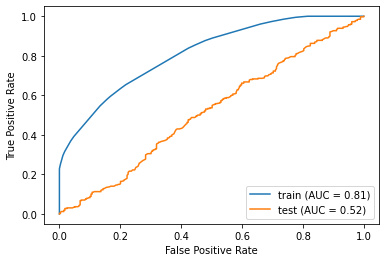

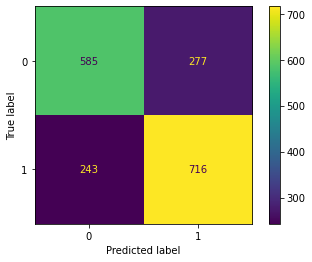

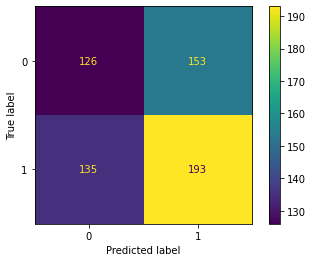

In [107]:
#xgboost(X_train_scaled, X_test_scaled, y_train, y_test, cv=5)